In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
original_data = pd.read_csv("Customer_data.csv")
original_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [28]:
print("Rows: ", original_data.shape[0], "\nColumns: ", original_data.shape[1])

Rows:  7043 
Columns:  21


In [29]:
# Checking the data types of all features
original_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
original_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [31]:
original_data.isna().sum()
# from this we analyzed that there are no missing values in our dataset, thus this ensure that without doing any data cleaning we can perform further tasks

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
original_data = original_data.drop(['customerID'], axis = 1)

In [ ]:
# replacing the values with desired values

original_data['MultipleLines'] = original_data['MultipleLines'].replace({'No phone service': 'No'})
colsVal_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for cols in colsVal_replace:
    original_data[cols] = original_data[cols].replace({'No internet service': 'No'})
    original_data[cols] = original_data[cols].map({'No': 0, 'Yes': 1})


# Convert all remaining 'Yes'/'No' binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines']
for col in binary_cols:
    original_data[col] = original_data[col].map({'Yes': 1, 'No': 0})

# One hot encode
cols_encoding = ['InternetService', 'Contract', 'PaymentMethod']
original_data = pd.get_dummies(original_data, columns = cols_encoding, drop_first=True)

original_data['Churn'] = original_data['Churn'].map({'No': 0, 'Yes': 1}).astype(int)



In [37]:
original_data.dtypes

gender                                    object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [ ]:
# as from the above code total charges has an object type thus now convert to numeric
original_data['TotalCharges'] = pd.to_numeric(original_data['TotalCharges'], errors ='coerce')

In [ ]:
# now checking the null values in the total charges column
original_data['TotalCharges'].isna().sum()

np.int64(11)

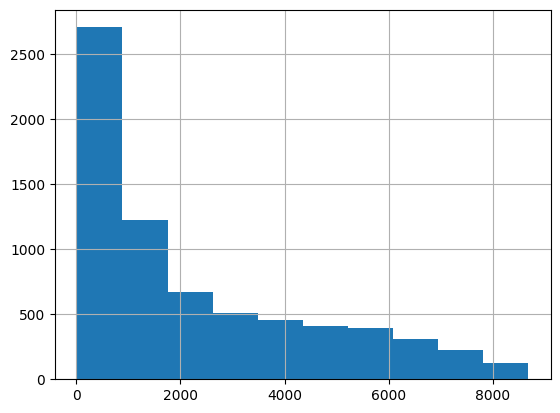

In [ ]:
# now to avoid any misleading value in our dataset we prefer to fill or remove it
original_data['TotalCharges'].hist()
# from the histogram we gto to know that the data is negatively skewed thus filling the null values with median is good
original_data['TotalCharges'] = original_data['TotalCharges'].fillna(original_data['TotalCharges'].median())

In [ ]:
# now converting the bool features into numeric
cols = ['InternetService_Fiber optic','InternetService_No',
        'Contract_One year','Contract_Two year',
        'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check',
        'PaymentMethod_Mailed check']

for col in cols:
    original_data[col] = original_data[col].astype(int)


# gender columns conversion
original_data['gender'] = original_data['gender'].map({'Female': 1, 'Male': 0}).astype(int)

In [55]:
# Training & Testing data split

y = original_data['Churn']
X = original_data.copy()
X = X.drop('Churn', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)


In [57]:
# Scaling the data before applying the classification model

scaler = MinMaxScaler()
scaler.fit(X_train)
# transforming the train data and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)